### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import nltk

### Loading the dataset

In [4]:
dataset=pd.read_csv('SMSSpamCollection', sep='\t') #tab separated
dataset.head()


,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis (EDA)

In [5]:
dataset.isnull().sum() #Checking for missing values

labels     0
message    0
dtype: int64

In [6]:
dataset.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
dataset.groupby("labels").describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

###### There are a total of 4825 legit messages and 747 spam messages.

###### We now make a new column (feature) to detect how long the text messages are.

In [10]:
dataset["length"]=dataset["message"].apply(len)
dataset.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

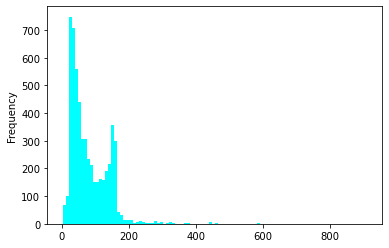

In [15]:
dataset['length'].plot(bins=100, kind='hist', color='cyan') 

In [11]:
dataset.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

###### There is a whole message with a whooping 910 words!!!.. Lets identify it using masking.

In [18]:
long_sms=dataset[dataset["length"]==910]["message"].iloc[0]
print(long_sms)


For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


#### Distribution of the Target Variable ('labels')

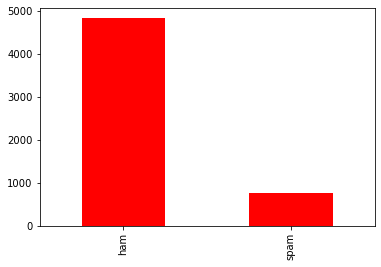

In [41]:
dataset["labels"].value_counts().plot.bar(color='red');

###### We visualize  the message objects to see if message length is a distinguishing feature between ham and spam


<AxesSubplot:xlabel='labels', ylabel='length'>

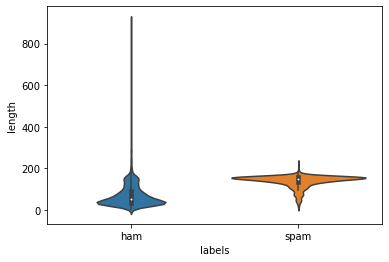

In [20]:
dataset_viz = dataset.copy()
sns.violinplot(x="labels", y="length", data=dataset_viz)

###### We discover a Trend that spam messages tend to have more characters.


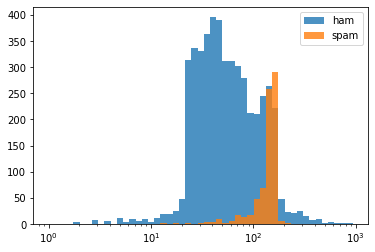

In [22]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(dataset[dataset['labels']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(dataset[dataset['labels']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

###### A Further investigation shows that there's a small range of values where a message is more likely to be spam than a legitimate one.


### Word Clouds for Ham and Spam messages

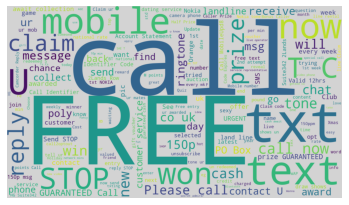

In [29]:
spamtext=""
for text in dataset["message"][dataset["labels"]=="spam"]:
    spamtext+=text

spamcloud=WordCloud(background_color='lightgrey',colormap='viridis', width=1400, height=800 ).generate(spamtext)
plt.figure()
plt.imshow(spamcloud)
plt.axis("off")
plt.show()

###### The wordcloud gives us an idea on the frequency of words in the spam messages. Next we plot the top 20 words against their mean frequencies.



Text(0, 0.5, 'mean(frequencies)')

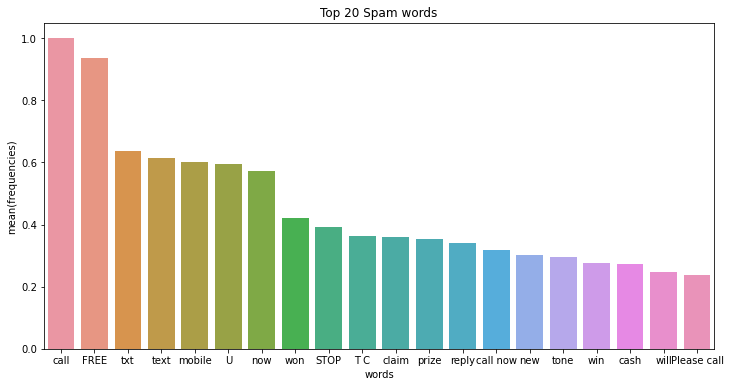

In [30]:
dataset_spam = pd.DataFrame()
dataset_spam['words'] = spamcloud.words_.keys()
dataset_spam['frequencies'] = spamcloud.words_.values()
plt.figure(figsize=(12, 6))
plt.title("Top 20 Spam words")
sns.barplot(x='words', y='frequencies', data=dataset_spam.sort_values(by=['frequencies'], ascending=[0]).head(20))
plt.ylabel(ylabel='mean(frequencies)')

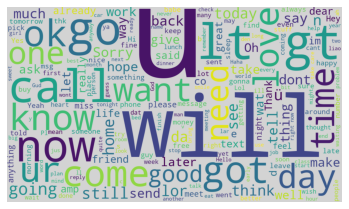

In [34]:
hamtext=""
for text in dataset["message"][dataset["labels"]=="ham"]:
    hamtext+=text

hamcloud=WordCloud(background_color='lightgrey',colormap='viridis', width=1200, height=700 ).generate(hamtext)

plt.figure()
plt.imshow(hamcloud)
plt.axis("off")
plt.show()


###### The wordcloud gives us an idea on the frequency of words in the ham messages. Next we plot the top 20 ham words against their mean frequencies.

Text(0, 0.5, 'mean(frequencies)')

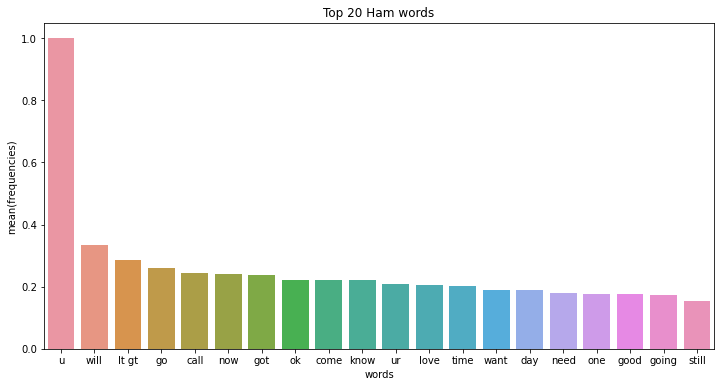

In [37]:
dataset_ham = pd.DataFrame()
dataset_ham['words'] = hamcloud.words_.keys()
dataset_ham['frequencies'] = hamcloud.words_.values()
plt.figure(figsize=(12, 6))
plt.title("Top 20 Ham words")
sns.barplot(x='words', y='frequencies', data=dataset_ham.sort_values(by=['frequencies'], ascending=[0]).head(20))
plt.ylabel(ylabel='mean(frequencies)')

Text(0, 0.5, 'mean(frequencies)')

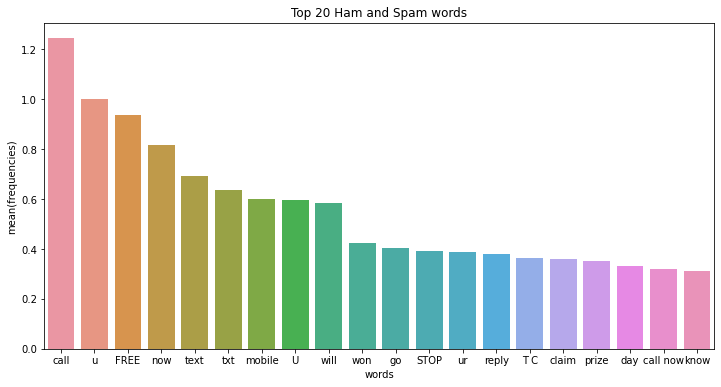

In [43]:
from numpy import sum
dataset_words = dataset_spam.append(dataset_ham)
plt.figure(figsize=(12, 6))
plt.title("Top 20 Ham and Spam words")
sns.barplot(x='words', y='frequencies', data=dataset_words.groupby('words', as_index=False).aggregate(sum).sort_values(by=['frequencies'], ascending=[0]).head(20))
plt.ylabel(ylabel='mean(frequencies)')

###### A plot of the top 20  words for both hum and spam messages against their mean frequencies.

## To be cont...Up Next; Data Preprocessing, Model Training and Evaluation, and Data Pipeline